In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine,reflect=True)

C:\Users\ashle\AppData\Local\Temp\ipykernel_44280\4266886613.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(autoload_with=engine,reflect=True)


In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

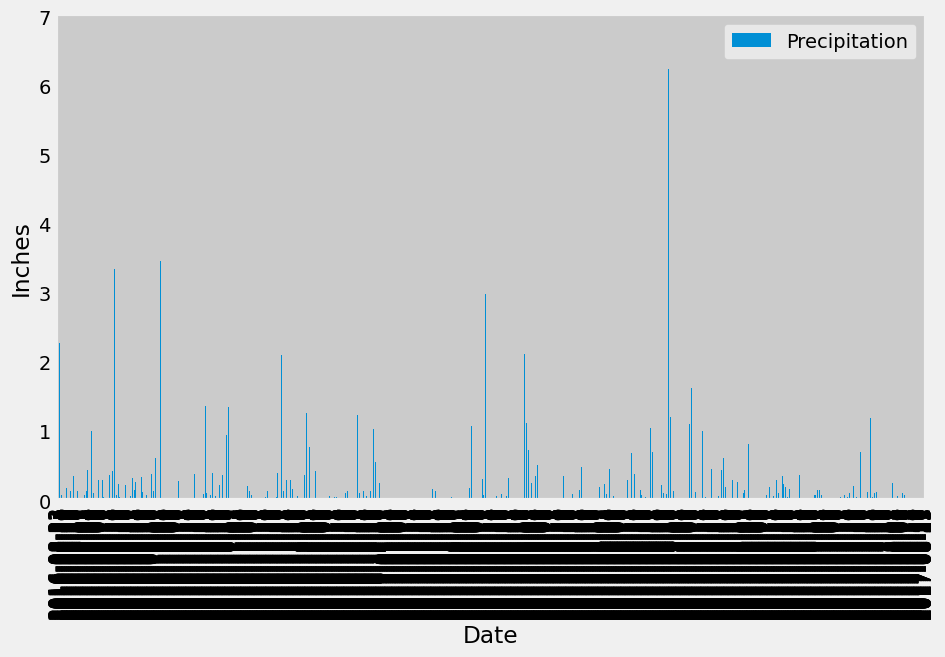

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_date = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
recent_date = dt.date(2017, 8, 23)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= last_date, measurement.date <= recent_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['date','prcp'])
df['prcp'] = pd.to_numeric(df['prcp'], errors='coerce')

# Sort the dataframe by date
df_sorted = df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
df_sorted.plot(x='date', y='prcp', kind='bar', title='', figsize=(10, 6))

# Add labels to the axes
plt.xlabel('Date')
plt.ylabel('Inches')

# Add a legend to the plot
plt.legend(['Precipitation'])

# Display the plot
plt.show()


#plt.figure(figsize=(10, 6))
#plt.bar(df_sorted['date'], df_sorted['prcp'], width=5)
#plt.xlabel('Date')
#plt.ylabel('Precipitation (inches)')
#plt.title('Precipitation Over the Last 12 Months')
#plt.xticks(rotation=45)
#plt.tight_layout()
#plt.show()

In [32]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df['prcp'].describe()


summary_df = pd.DataFrame(summary_stats)
summary_df


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [39]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station.station).distinct().count()
print(total_stations)

9


In [42]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(station.station, func.count(station.station).label('row_count')) \
                        .group_by(station.station) \
                        .order_by(func.count(station.station).desc()) \
                        .all()
active_stations

[('USC00519523', 1),
 ('USC00519397', 1),
 ('USC00519281', 1),
 ('USC00518838', 1),
 ('USC00517948', 1),
 ('USC00516128', 1),
 ('USC00514830', 1),
 ('USC00513117', 1),
 ('USC00511918', 1)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

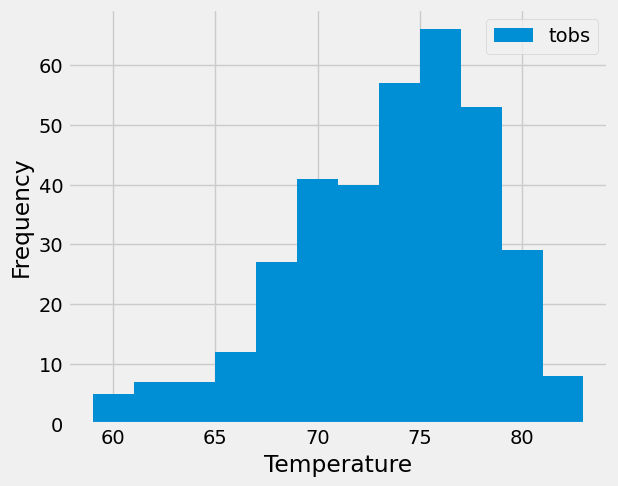

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()